<a href="https://colab.research.google.com/github/DSilvia08/Para-entregar/blob/main/Tarea_ejercicio_del_libro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
#Ejercicio 5.5
La demanda diaria de un cierto artículo está regida por una distribución binomial con parámetros $n=6$ y $\theta =\frac 12$. El tiempo de entrega en días es una variable aleatoria de Poisson con $\lambda =3$. El costo de mantener una unidad en inventario es de {$1} por día. el costo faltante es de {$10} por unidad, y el costo de ordenar es de {$50} por orden. Se desea comparar dos políticas para llevar el inventario:
1. Ordenar cada 8 días hasta tener 30 artículos en inventario
2. Ordener hasta 30 artículos cuando el nivel de inventario sea menor o igual a 10.

Si se asume que las unidades faltantes en un ciclo con surtidas por la nueva orden de arriba en el próximo ciclo, **¿Cuál de las dos políticas descritas es más económica?**

La demanda diaria $X\sim B(n=6,\theta=\frac 12)$.

La distribución binomial es una distribución discreta de probabilidad descrita por dos parámetros: n el número de experimentos realizados, y p la probabilidad de éxito. \
La variable aleatoria, suma de todas estas variables aleatorias, cuenta el número de éxitos y sigue una distribución binomial. \
Es posible entonces obtener la probabilidad de k éxitos en una repetición de n experimentos.
$$P(X=k)=\binom{n}{k} p^k(1-p)^{n-k}$$

Los valores de la función de distribución acumulativa para esta distribución binomial son:
$$P(X\leq 0)=\frac{1}{64}\approx 0.01562$$
$$P(X\leq 1)=\frac{7}{64}\approx 0.10937$$
$$P(X\leq 2)=\frac{22}{64}\approx 0.34375$$
$$P(X\leq 3)=\frac{42}{64}\approx 0.65625$$
$$P(X\leq 4)=\frac{57}{64}\approx 0.89062$$
$$P(X\leq 5)=\frac{63}{64}\approx 0.98437$$
$$P(X\leq 6)=1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [34]:
def distribucion_binomial(u): #Función que retorna la demanda diaria
                              #valores de 0 a 6
  if 0<=u<0.01562:
    return 0
  elif 0.01562<=u<0.10937:
    return 1
  elif 0.10937<=u<0.34375:
    return 2
  elif 0.34375<=u<0.65625:
    return 3
  elif 0.65625<=u<0.89062:
    return 4
  elif 0.89062<=u<0.98437:
    return 5
  else:
    return 6

Tiempo de entrega $Y\sim P(λ)$. Por lo cual haré uso de la función **random.exponential** \
$$random.exponencial \ ( escala = λ , size = Ninguno ) $$
de la librería numpy

##1. Ordenar cada 8 días hasta tener 30 artículos en inventario

In [35]:
def simular_politica(T, S, lamda, rep, costounitario, costoperdida, costo_orden,NvmaxInventario):
    t = 0 #tiempo actual
    Inventario_inicial = S
    tllegada = random.exponential(lamda) #tiempo de llegada
    dia_proveedor = rep #primer día que llega el proveedor
    costo = 0 #iniciar costo en 0
    Ordenes = 0 #Conteo de ordenes
    s=NvmaxInventario
    TIEMPOS = []
    INVENTARIO = []

    while t < T:
        tactual = t #tiempo anterior
        invactual = Inventario_inicial #inventario anterior
        TIEMPOS.append(tactual)
        INVENTARIO.append(Inventario_inicial)
        t = min(tllegada, dia_proveedor) # Avanza el tiempo al próximo evento (llegada de demanda o reposición)
        TIEMPOS.append(t)
        INVENTARIO.append(Inventario_inicial)
        costo += (t - tactual) * Inventario_inicial * costounitario # Calcula el costo de mantener inventario

        if t == tllegada: # Si el próximo evento es una llegada de demanda
            u=random.uniform(0,1)
            demanda=distribucion_binomial(u) #Genera la demanda
            if Inventario_inicial >= demanda: # Si hay suficiente inventario
                Inventario_inicial -= demanda #satisface demanda
            else: #caso contario (demanda insatisfecha)
                Faltantes = demanda - Inventario_inicial  # Se registra la cantidad no satisfecha
                costo += Faltantes * costoperdida
                Inventario_inicial = 0 #No hay inventarios negativos

            tllegada += random.exponential(lamda) # Se programa la próxima llegada de demanda
        else: # Si el próximo evento es una reposición de inventario
          if s==0:
            Inventario_inicial = S # Se repone el inventario al nivel máximo
            dia_proveedor += rep
            Ordenes += 1
          elif s!=0:
            if Inventario_inicial<=s: # Se repone el inventario al nivel máximo si está por debajo de 10
              Inventario_inicial=S
            dia_proveedor += rep  # Se programa la próxima reposición
            Ordenes += 1  # Se incrementa el contador de órdenes

    return costo + Ordenes * costo_orden, TIEMPOS, INVENTARIO

In [36]:
# Parámetros para ambas políticas
Tiempo_total = 100 #Tiempo total de simulación
Inventario_maximo = 30 #Nivel de inventario a reponer
lamda = 3 #lambda de la exponencial
longitud_dias = 8 #Longitud de días entre cada llegada del proveedor
costounitario = 1 #Costo unitario para mantener inventario
costoperdida = 10 #Costo por venta perdida
costo_orden = 50 #Costo por ordenar

In [37]:
Nivel_maxInventario1 = 0 #Nivel máximo de inventario antes de realizar un pedido

In [38]:
costo1, listatiempo1, listainventario1 = simular_politica(Tiempo_total, Inventario_maximo, lamda, longitud_dias, costounitario, costoperdida, costo_orden, Nivel_maxInventario1)

In [39]:
print("Costo total con política 1:", costo1)

Costo total con política 1: 3132.4305225878275


##2. Ordener hasta 30 artículos cuando el nivel de inventario sea menor o igual a 10

In [40]:
Nivel_maxInventario2 = 10 #Nivel máximo de inventario antes de realizar un pedido

In [41]:
costo2, listatiempo2, listainventario2 = simular_politica(Tiempo_total, Inventario_maximo, lamda, longitud_dias, costounitario, costoperdida, costo_orden, Nivel_maxInventario2)

In [42]:
print("Costo total con política 2:", costo2)

Costo total con política 2: 2522.558026881627


In [43]:
# Resultados
print("Costo total con política 1:", costo1)
print("Costo total con política 2:", costo2)

Costo total con política 1: 3132.4305225878275
Costo total con política 2: 2522.558026881627


In [44]:
if costo1 < costo2:
    print("La política 1 es más económica.")
else:
    print("La política 2 es más económica.")

La política 2 es más económica.


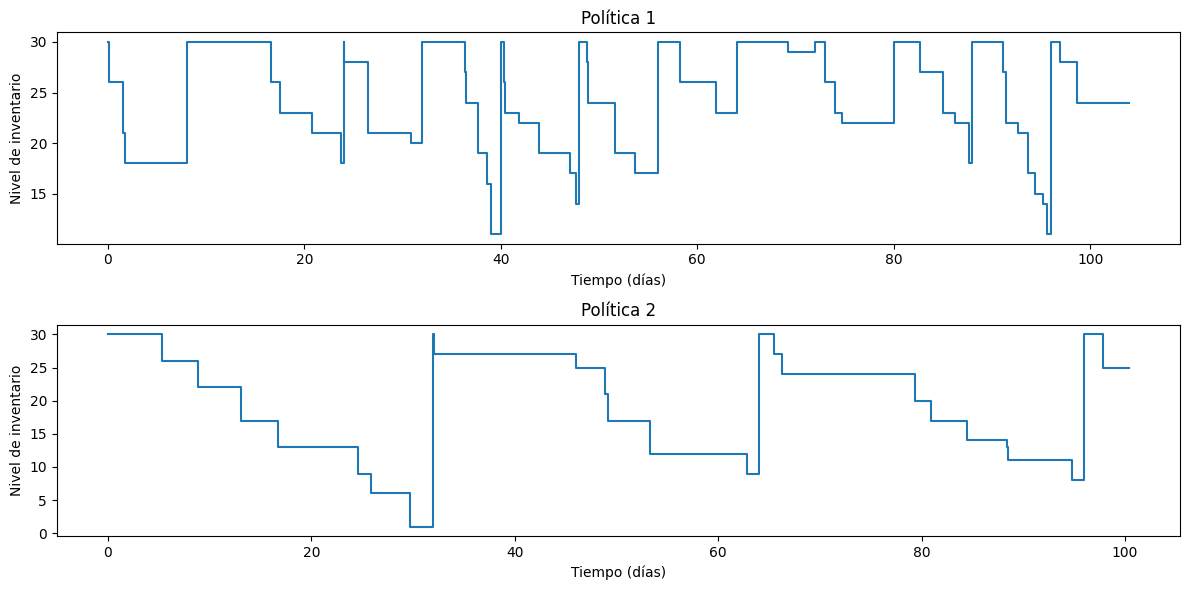

In [45]:
# Gráficas
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1) #e está creando un subgráfico en una disposición de 2 filas por 1 columna y seleccionando el segundo subgráfico (que corresponde a la segunda fila)
plt.plot(listatiempo1, listainventario1) #grafica distribución de inventario Política 1
plt.xlabel('Tiempo (días)')
plt.ylabel('Nivel de inventario')
plt.title('Política 1')

plt.subplot(2, 1, 2)
plt.plot(listatiempo2, listainventario2) #grafica distribución de inventario Política 2
plt.xlabel('Tiempo (días)')
plt.ylabel('Nivel de inventario')
plt.title('Política 2')

plt.tight_layout() #para que los gráficos no se encimen
plt.show()